In [6]:
import matplotlib.pyplot as plt

from tensorflow import keras

In [2]:
model = keras.models.load_model('best-cnn-model.h5')

In [3]:
model.layers

In [4]:
conv = model.layers[0]
conv.weights[0].shape, conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [5]:
conv_weights = conv.weights[0].numpy()
conv_weights.mean(), conv_weights.std()

(-0.022830168, 0.25486073)

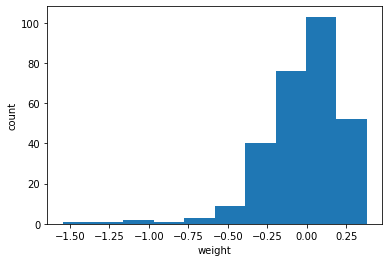

In [7]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

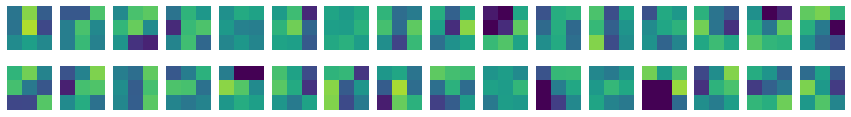

In [8]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [9]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [12]:
no_training_conv = no_training_model.layers[0]
no_training_conv.weights[0].shape

TensorShape([3, 3, 1, 32])

In [13]:
no_training_weights= no_training_conv.weights[0].numpy()
no_training_weights.mean(), no_training_weights.std()

(-0.0076948013, 0.08161641)

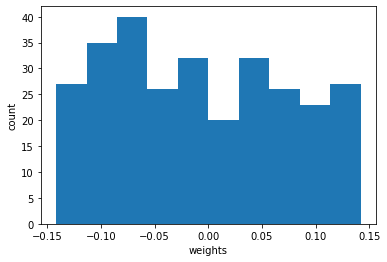

In [14]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

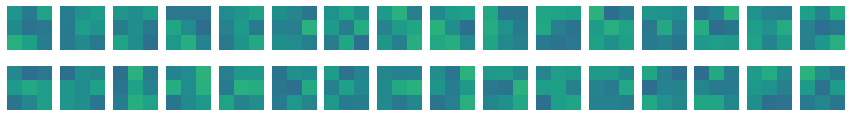

In [16]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [17]:
model.input

<tf.Tensor 'conv2d_input:0' shape=(None, 28, 28, 1) dtype=float32>

In [18]:
conv_acti = keras.Model(model.input, model.layers[0].output)

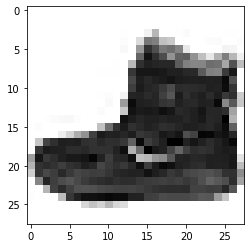

In [19]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap=('gray_r'))
plt.show()

In [20]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

In [21]:
feature_maps.shape

(1, 28, 28, 32)

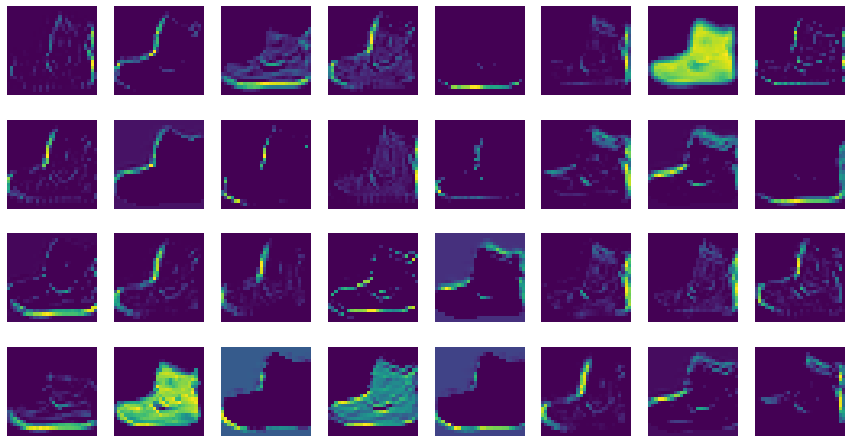

In [22]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i, j].axis('off')
plt.show()

In [27]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [28]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

In [29]:
feature_maps.shape

(1, 14, 14, 64)

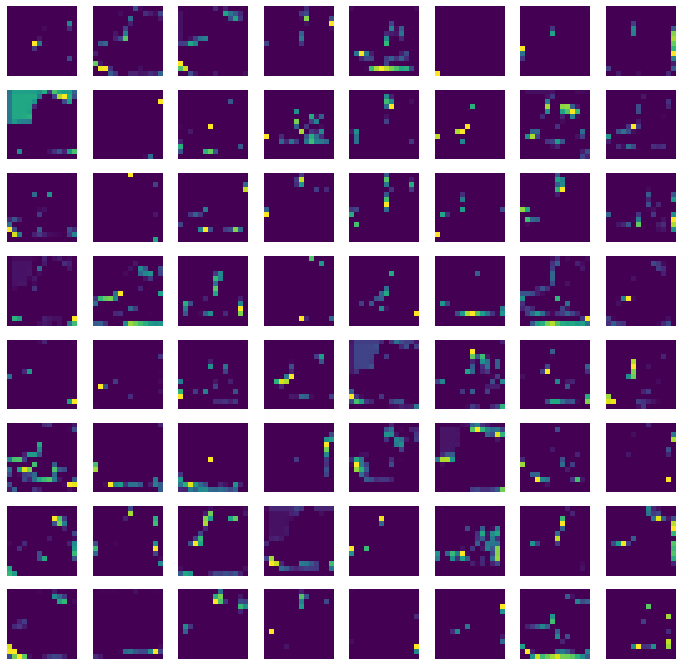

In [32]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i, j].axis('off')
plt.show()

In [33]:
model.input

<tf.Tensor 'conv2d_input:0' shape=(None, 28, 28, 1) dtype=float32>